# 1st Approach

### A TensorFlow-based MNIST classification model using the Sequential API, with convolutional and dense layers.

Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


469/469 - 8s - 18ms/step - accuracy: 0.9299 - loss: 0.2373 - val_accuracy: 0.9801 - val_loss: 0.0635
Epoch 2/10
469/469 - 8s - 17ms/step - accuracy: 0.9819 - loss: 0.0600 - val_accuracy: 0.9859 - val_loss: 0.0429
Epoch 3/10
469/469 - 8s - 18ms/step - accuracy: 0.9870 - loss: 0.0413 - val_accuracy: 0.9892 - val_loss: 0.0344
Epoch 4/10
469/469 - 9s - 19ms/step - accuracy: 0.9901 - loss: 0.0313 - val_accuracy: 0.9880 - val_loss: 0.0346
Epoch 5/10
469/469 - 9s - 19ms/step - accuracy: 0.9922 - loss: 0.0259 - val_accuracy: 0.9909 - val_loss: 0.0266
Epoch 6/10
469/469 - 10s - 20ms/step - accuracy: 0.9928 - loss: 0.0213 - val_accuracy: 0.9902 - val_loss: 0.0275
Epoch 7/10
469/469 - 9s - 19ms/step - accuracy: 0.9942 - loss: 0.0172 - val_accuracy: 0.9907 - val_loss: 0.0260
Epoch 8/10
469/469 - 9s - 20ms/step - accuracy: 0.9952 - loss: 0.0141 - val_accuracy: 0.9913 - val_loss: 0.0315
Epoch 9/10
469/469 - 9s - 20ms/step - accuracy: 0.9965 - loss: 0.0112 - val_accuracy: 0.9913 - val_loss: 0.0273
Ep

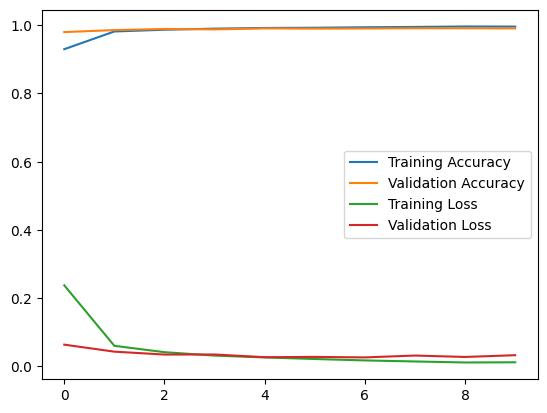

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize data
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define the model architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, 
                    batch_size=128, 
                    validation_data=(x_test, y_test), 
                    verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.2f}%')

# Plot the training and validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# 2nd Approach

### A Keras-based MNIST classification model using the Sequential API, with convolutional and dense layers, and model saving capabilities.

Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


750/750 - 9s - 12ms/step - accuracy: 0.9338 - loss: 0.2138 - val_accuracy: 0.9776 - val_loss: 0.0773
Epoch 2/5
750/750 - 9s - 11ms/step - accuracy: 0.9813 - loss: 0.0594 - val_accuracy: 0.9800 - val_loss: 0.0712
Epoch 3/5
750/750 - 9s - 12ms/step - accuracy: 0.9871 - loss: 0.0411 - val_accuracy: 0.9849 - val_loss: 0.0521
Epoch 4/5
750/750 - 9s - 12ms/step - accuracy: 0.9902 - loss: 0.0316 - val_accuracy: 0.9896 - val_loss: 0.0402
Epoch 5/5
750/750 - 9s - 12ms/step - accuracy: 0.9926 - loss: 0.0244 - val_accuracy: 0.9880 - val_loss: 0.0416
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9851 - loss: 0.0443


Test Loss: 0.034, Test Accuracy: 0.989


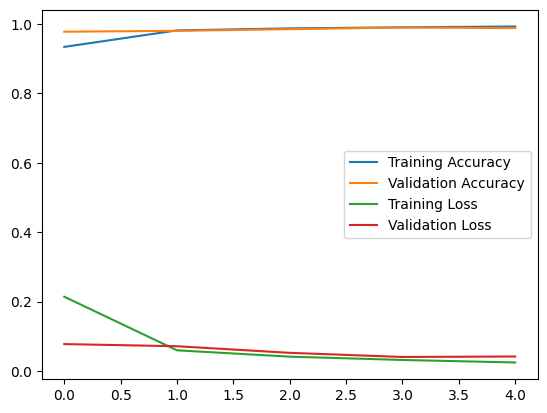

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Data preprocessing
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Data augmentation (optional)
# X_train = X_train.reshape(-1, 28, 28, 1)
# X_test = X_test.reshape(-1, 28, 28, 1)

# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=5, 
                    batch_size=64, validation_split=0.2, 
                    verbose=2)

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss:.3f}, Test Accuracy: {test_acc:.3f}')

# Save the model
model.save('models_saved/model.h5')

# Plot the training and validation accuracy and loss
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()